In [70]:
import pandas as pd
import matplotlib
from matplotlib import pylab as plt

In [71]:
# Read the Data
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [72]:
df['work_type']

0             Private
1       Self-employed
2             Private
3             Private
4       Self-employed
            ...      
5105          Private
5106    Self-employed
5107    Self-employed
5108          Private
5109         Govt_job
Name: work_type, Length: 5110, dtype: object

In [73]:
# EDA: data shape
df.shape

(5110, 12)

In [74]:
df_X = df.drop(columns = ['id','stroke'])
print(df_X.shape[1])

10


In [75]:
# Show data types
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [76]:
# EDA: the distribution of target variable
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [77]:
# EDA: show the unique categories in each categorical feature
print(df['smoking_status'].unique())
print(df['gender'].unique())
print(df['work_type'].unique())
print(df['ever_married'].unique())
print(df['smoking_status'].unique())

['formerly smoked' 'never smoked' 'smokes' 'Unknown']
['Male' 'Female' 'Other']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Yes' 'No']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


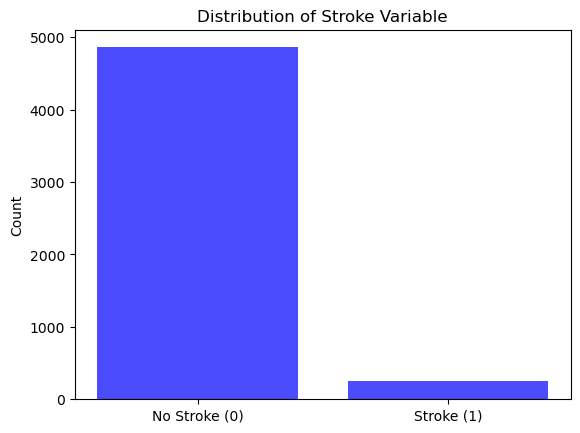

In [83]:
# Assuming 'df' is your DataFrame and 'stroke' is the column of interest
plt.hist(df['stroke'], bins=[-0.5, 0.5, 1.5], alpha=0.7, color='blue', rwidth=0.8)

# Set the x-axis labels to be more informative
plt.xticks([0, 1], ['No Stroke (0)', 'Stroke (1)'])

# Set the y-axis label
plt.ylabel('Count')

# Set the title of the histogram
plt.title('Distribution of Stroke Variable')

# Show the plot
plt.show()

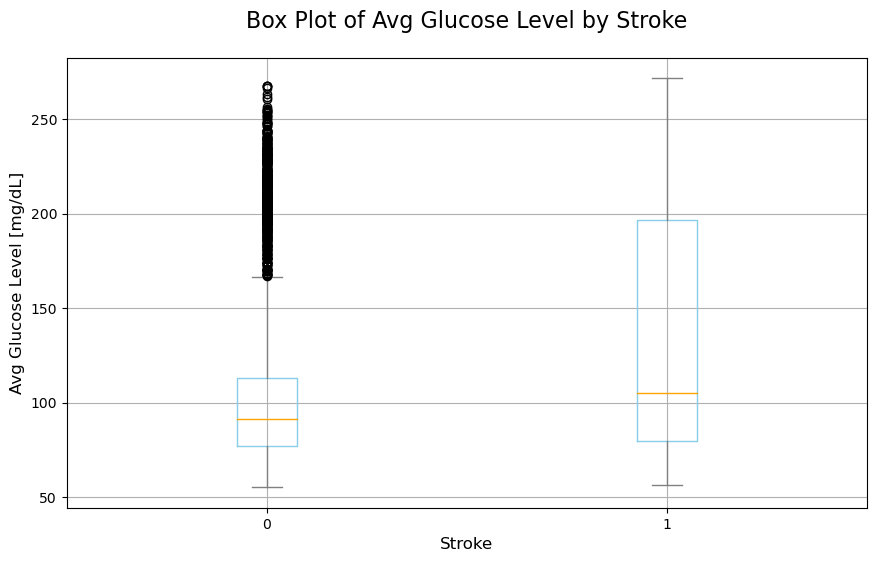

In [79]:
# EDA: Use box plot to show the relationship between stroke and average glucose level

box_colors = {'boxes': 'skyblue', 'whiskers': 'gray', 'medians': 'orange', 'caps': 'gray'}
bp = df[['avg_glucose_level', 'stroke']].boxplot(by='stroke', figsize=(10, 6), color=box_colors)
plt.suptitle('Box Plot of Avg Glucose Level by Stroke', fontsize=16)
plt.title('')
plt.xlabel('Stroke', fontsize=12)
plt.ylabel('Avg Glucose Level [mg/dL]', fontsize=12)

plt.show()

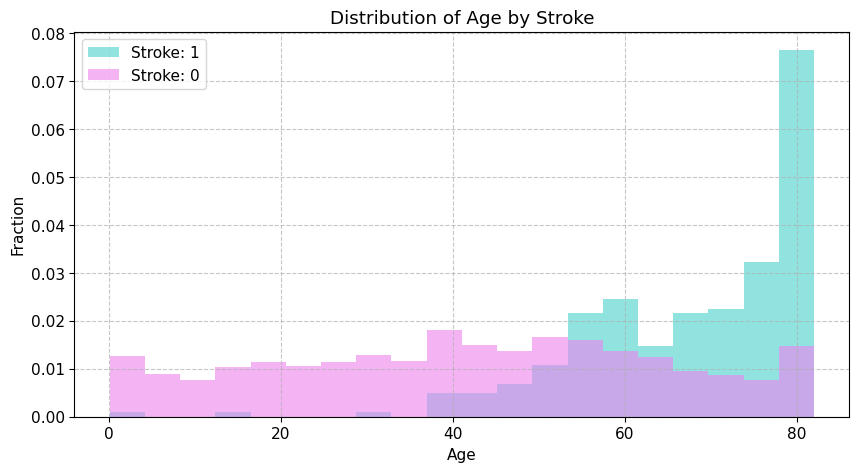

In [166]:
# EDA: category-specific histogram to show the different distribution of age by stroke
categories = df['stroke'].unique()
bin_range = (df['age'].min(), df['age'].max())

plt.figure(figsize=(10, 5))
colors = ['mediumturquoise','violet'] 

for idx, c in enumerate(categories):
    plt.hist(
        df[df['stroke'] == c]['age'],
        alpha=0.6,
        label='Stroke: ' + str(c),
        range=bin_range,
        bins=20,
        density=True,
        color=colors[idx] 
    )

plt.title('Distribution of Age by Stroke')
plt.xlabel('Age')
plt.ylabel('Fraction')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7) 
plt.show()

<Figure size 1000x500 with 0 Axes>

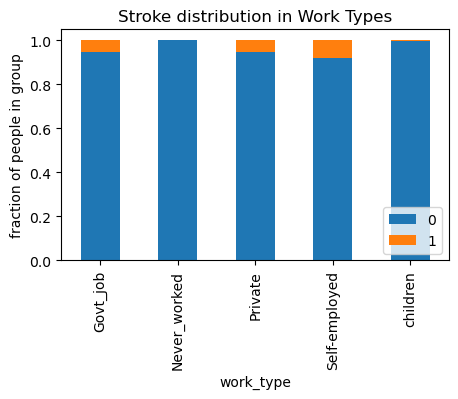

In [64]:
plt.figure(figsize=(10, 5))
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.title('Stroke distribution in Work Types')
plt.savefig('worktype and stroke.png')
plt.show()

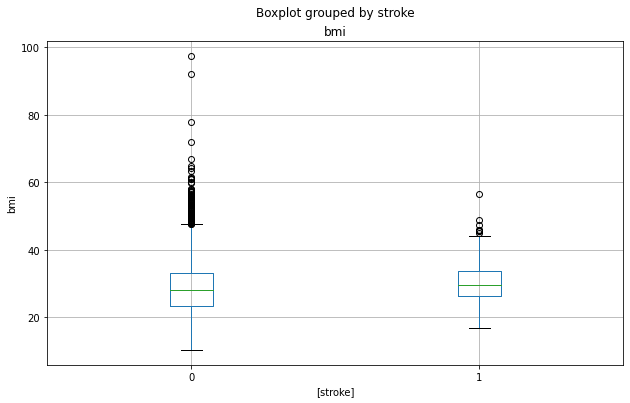

In [12]:
df[['bmi','stroke']].boxplot(by='stroke',figsize=(10,6))
plt.ylabel('bmi')
plt.show()

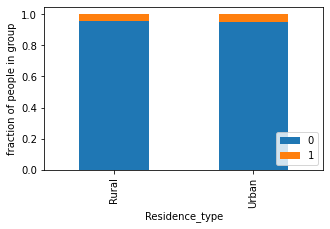

In [13]:
count_matrix = df.groupby(['Residence_type', 'stroke']).size().unstack()
#print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
#print(count_matrix_norm)

count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

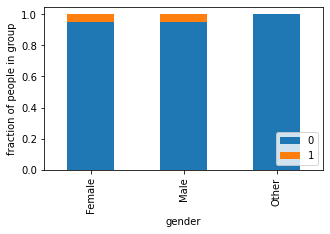

In [14]:
count_matrix = df.groupby(['gender', 'stroke']).size().unstack()
#print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
#print(count_matrix_norm)

count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

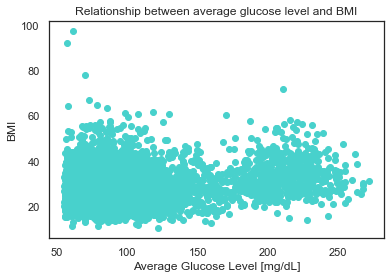

In [41]:
plt.scatter(df['avg_glucose_level'], df['bmi'], c ="mediumturquoise")
plt.title('Relationship between average glucose level and BMI')
plt.xlabel('Average Glucose Level [mg/dL]')
plt.ylabel('BMI')
plt.show()

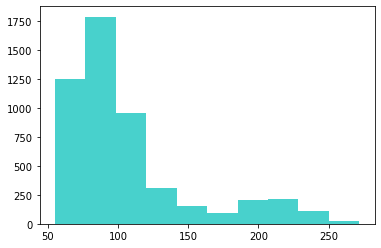

In [16]:
plt.hist(df['avg_glucose_level'],color = 'mediumturquoise')
plt.show()

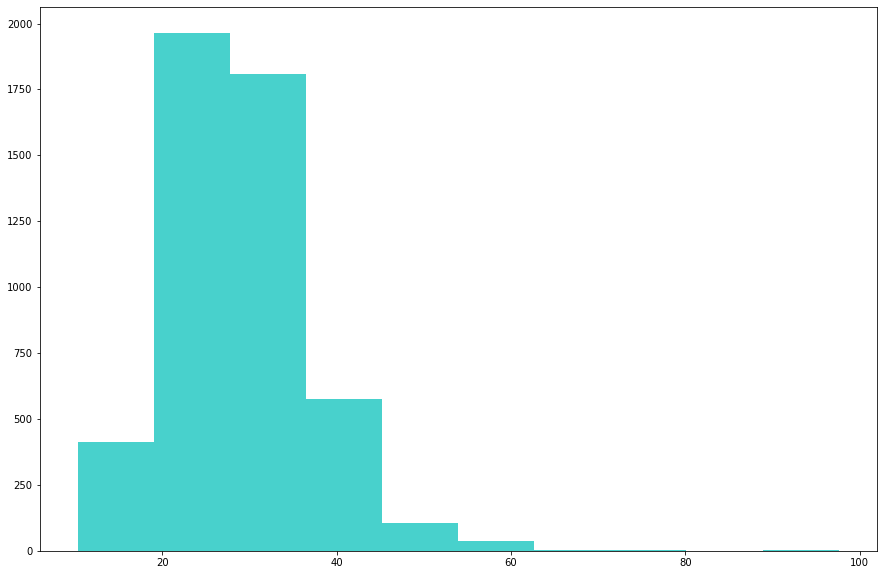

In [17]:
plt.figure(figsize = (15,10))
plt.hist(df['bmi'], color = 'mediumturquoise')
plt.show()

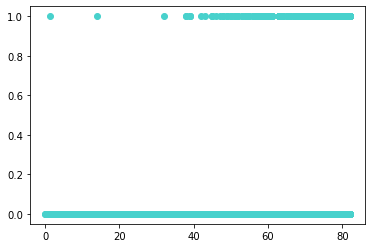

In [18]:
plt.scatter(df['age'], df['stroke'], c ="mediumturquoise")
plt.show()

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


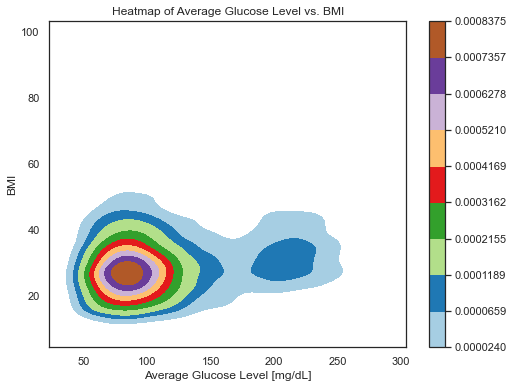

In [42]:
sns.set(style="white")
plt.figure(figsize=(8, 6))

sns.kdeplot(df['avg_glucose_level'], df['bmi'], cmap="Paired", shade=True, cbar=True)
plt.xlabel("Average Glucose Level [mg/dL]")
plt.ylabel("BMI")

plt.title("Heatmap of Average Glucose Level vs. BMI")
plt.show()

In [34]:
df_r = df.dropna()
print(df_r.shape)
# drop features with missing values
df_c = df.dropna(axis=1)
print(df_c.shape)

(4909, 12)
(5110, 11)


In [39]:
unknown_smoke = df[df['smoking_status']=='Unknown']
print(unknown_smoke.shape)
unknown_smoking_r = unknown_smoke.dropna()
print(unknown_smoking_r.shape)
201

(1544, 12)
(1483, 12)


## Preprocessing: Build a Preprocessor

In [80]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler

# collect which encoder to use on each feature
# needs to be done manually
onehot_ftrs = ['gender','hypertension', 'heart_disease','ever_married','work_type','Residence_type','smoking_status']
minmax_ftrs = ['age']
std_ftrs = ['avg_glucose_level','bmi']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)
    ]
)

In [81]:
from sklearn.pipeline import make_pipeline
# Function for the ML Pipeline
def MLpipe_StratifiedFFold_accuracy(X,y,preprocessor,ML_algo,param_grid):
    # lists to be returned 
    test_scores = []
    best_models = []
    for i in range(5):
        print('-----New random state-----')
        #Split the data into other and test
        X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state=42*i, stratify=y)
        #Use Stratified K Fold to split other data into train data and val data
        n_splits = 5
        kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42*i)
        
        # Use GridSearchCV for hyperparameter tuning
        pipeline = make_pipeline(preprocessor, ML_algo)
        grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_other, y_other)

        # Get the best model and test on the test set
        best_model = grid_search.best_estimator_
        best_models.append(best_model)

        y_pred = best_model.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_pred)
        test_scores.append(test_accuracy)
        
    return test_scores, best_models

In [82]:
from sklearn.model_selection import train_test_split, StratifiedKFold

# Split data
y = df['stroke']
X = df.drop(columns = ['id','stroke'])
X = X.dropna()
y = y[X.index]

**Model Slection**
1. Support Vector Machines (SVM)
2. Random Forest
3. XGBoost
4. K-Nearest Neighbors (KNN)

## Training Data - Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 10, 20],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4],
    'randomforestclassifier__class_weight': ['balanced', 'balanced_subsample', None]
}

RFC = RandomForestClassifier(random_state = 42)
RFC_test_scores, RFR_best_models = MLpipe_StratifiedFFold_accuracy(X,y,preprocessor,RFC,param_grid)
print("Test Scores:", RFC_test_scores)
print("Mean of test scores:", np.mean(RFC_test_scores))
print("Standard deviation of test scores:", np.std(RFC_test_scores))

-----New random state-----
-----New random state-----
-----New random state-----
-----New random state-----
-----New random state-----
Test Scores: [0.9572301425661914, 0.9572301425661914, 0.9562118126272913, 0.9572301425661914, 0.9562118126272913]
Mean of test scores: 0.9568228105906312
Standard deviation of test scores: 0.0004988777480209946


**Maximize Recall by Tuning Parameters in RF Model**

In [161]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Define the parameter grid
param_grid = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [10, 20, 30, None],
    'randomforestclassifier__min_samples_split': [2, 5],
    'randomforestclassifier__min_samples_leaf': [1, 2],
    'randomforestclassifier__class_weight': [{0: 1, 1: 10}, {0: 1, 1: 15}, 'balanced', 'balanced_subsample']
}

# Initialize RandomForestClassifier and SMOTE
RFC = RandomForestClassifier(random_state=42)
smote = SMOTE(random_state=42)

# Initialize lists for metrics
best_models = []
accuracy_scores = []
recalls = []
precisions = []
f1_scores = []
confusion_matrices_list = []  # Renamed list

for i in range(5):
    print('-----New random state-----')
    # Split the data
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state=42*i, stratify=y)
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42*i)
        
    # Pipeline with SMOTE and RandomForestClassifier
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', smote),
        ('randomforestclassifier', RFC)
    ])

    # GridSearchCV focused on recall
    grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='recall', n_jobs=-1)
    grid_search.fit(X_other, y_other)

    # Best model
    best_model = grid_search.best_estimator_

    # Predict probabilities and adjust the threshold
    y_prob = best_model.predict_proba(X_test)[:, 1]
    threshold = 0.3  # Adjust based on your requirement
    y_pred = (y_prob > threshold).astype(int)

    # Calculate and store performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    recall = recall_score(y_test, y_pred)
    recalls.append(recall)
    precision = precision_score(y_test, y_pred)
    precisions.append(precision)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)
    
    # Calculate confusion matrix and store it
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices_list.append(cm)
    print(f'Accuracy: {accuracy}, Recall: {recall}, Precision: {precision}, F1: {f1}')
    print(f'Confusion Matrix:\n{cm}')

# Optionally, calculate the average of the metrics
average_recall = np.mean(recalls)
print("Average Recall:", average_recall)

-----New random state-----
Accuracy: 0.5162932790224033, Recall: 0.8809523809523809, Precision: 0.07297830374753451, F1: 0.13479052823315119
Confusion Matrix:
[[470 470]
 [  5  37]]
-----New random state-----
Accuracy: 0.5692464358452138, Recall: 0.8571428571428571, Precision: 0.07947019867549669, F1: 0.14545454545454545
Confusion Matrix:
[[523 417]
 [  6  36]]
-----New random state-----
Accuracy: 0.5285132382892057, Recall: 0.9285714285714286, Precision: 0.0781563126252505, F1: 0.14417744916820702
Confusion Matrix:
[[480 460]
 [  3  39]]
-----New random state-----
Accuracy: 0.5213849287169042, Recall: 0.9285714285714286, Precision: 0.07707509881422925, F1: 0.14233576642335766
Confusion Matrix:
[[473 467]
 [  3  39]]
-----New random state-----
Accuracy: 0.48065173116089616, Recall: 0.9285714285714286, Precision: 0.07142857142857142, F1: 0.1326530612244898
Confusion Matrix:
[[433 507]
 [  3  39]]
Average Recall: 0.9047619047619049


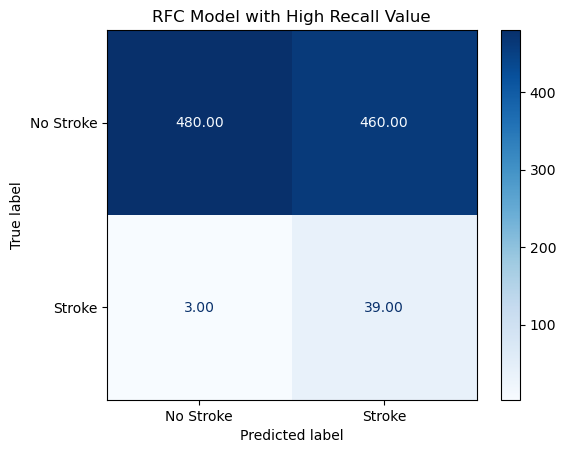

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

# Correct definition of the confusion matrix, as a NumPy array
cm = np.array([[480, 460],
     [  3,  39]])

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Stroke', 'Stroke'])
disp.plot(cmap='Blues', values_format=".2f")
plt.title("RFC Model with High Recall Value")
plt.savefig('confusion_matrix_recall.png')
plt.show()

## Support Vector Machines (SVM)

In [42]:
from sklearn.svm import SVC

param_grid = {
    'svc__C': [0.1, 1, 10, 100],  # Regularization parameter
    'svc__kernel': ['linear', 'rbf'],  # Kernel type
    'svc__gamma': ['scale', 'auto', 0.1, 0.01, 0.001],  # Kernel coefficient (only for 'rbf' and 'poly')
    'svc__class_weight': [None, 'balanced', {0: 1, 1: 5}]  # Class weights
}

svc = SVC()
SVC_test_scores, SVC_best_models = MLpipe_StratifiedFFold_accuracy(X,y,preprocessor,svc,param_grid)
print("Test Scores:", SVC_test_scores)
print("Mean of test scores:", np.mean(SVC_test_scores))
print("Standard deviation of test scores:", np.std(SVC_test_scores))

-----New random state-----
-----New random state-----
-----New random state-----
-----New random state-----
-----New random state-----
Test Scores: [0.9562118126272913, 0.9572301425661914, 0.9572301425661914, 0.9572301425661914, 0.9572301425661914]
Mean of test scores: 0.9570264765784113
Standard deviation of test scores: 0.0004073319755600657


## XGBoost

In [54]:
from xgboost import XGBClassifier
param_grid = {
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.2],
    'xgbclassifier__n_estimators': [50, 100, 200],
    'xgbclassifier__max_depth': [3, 5, 7],
    'xgbclassifier__subsample': [0.8, 1.0],
    'xgbclassifier__colsample_bytree': [0.8, 1.0],
    'xgbclassifier__gamma': [0, 1, 5],
    'xgbclassifier__scale_pos_weight': [12, 18, 24, 30, 36]  # Adjust for class imbalance
}

XGB = XGBClassifier(random_state = 42)
XGB_test_scores, XGB_best_models = MLpipe_StratifiedFFold_accuracy(X,y,preprocessor,XGB,param_grid)
print("Test Scores:", XGB_test_scores)
print("Mean of test scores:", np.mean(XGB_test_scores))
print("Standard deviation of test scores:", np.std(XGB_test_scores))

-----New random state-----
-----New random state-----
-----New random state-----
-----New random state-----
-----New random state-----
Test Scores: [0.939918533604888, 0.9358452138492872, 0.9317718940936863, 0.945010183299389, 0.9460285132382892]
Mean of test scores: 0.939714867617108
Standard deviation of test scores: 0.005403869312188025


In [13]:
from xgboost import XGBClassifier
param_grid = {
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.2],
    'xgbclassifier__n_estimators': [50, 100, 200],
    'xgbclassifier__max_depth': [3, 5, 7],
    'xgbclassifier__subsample': [0.8, 1.0],
    'xgbclassifier__colsample_bytree': [0.8, 1.0],
    'xgbclassifier__gamma': [0, 1, 5],
    'xgbclassifier__scale_pos_weight': [72]  # Adjust for class imbalance
}

XGB = XGBClassifier(random_state = 42)
XGB_test_scores, XGB_best_models = MLpipe_StratifiedFFold_accuracy(X,y,preprocessor,XGB,param_grid)
print("Test Scores:", XGB_test_scores)
print("Mean of test scores:", np.mean(XGB_test_scores))
print("Standard deviation of test scores:", np.std(XGB_test_scores))

-----New random state-----
-----New random state-----
-----New random state-----
-----New random state-----
-----New random state-----
Test Scores: [0.9287169042769857, 0.9317718940936863, 0.924643584521385, 0.9338085539714868, 0.9409368635437881]
Mean of test scores: 0.9319755600814663
Standard deviation of test scores: 0.0054421137335589976


## K-Nearest Neighbors (KNN)

In [78]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 10],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__metric': ['euclidean', 'manhattan', 'minkowski'],
    'kneighborsclassifier__p': [1, 2]
}

KNC = KNeighborsClassifier()
KNC_test_scores, KNC_best_models = MLpipe_StratifiedFFold_accuracy(X,y,preprocessor,KNC,param_grid)
print("Test Scores:", KNC_test_scores)
print("Mean of test scores:", np.mean(KNC_test_scores))
print("Standard deviation of test scores:", np.std(KNC_test_scores))

-----New random state-----
-----New random state-----
-----New random state-----
-----New random state-----
-----New random state-----
Test Scores: [0.9572301425661914, 0.9562118126272913, 0.9572301425661914, 0.9572301425661914, 0.955193482688391]
Mean of test scores: 0.9566191446028511
Standard deviation of test scores: 0.0008146639511201702


In [120]:
baseline_predictions = [0] * len(y_true)

# Step 3: Calculate baseline accuracy
baseline_accuracy = accuracy_score(y_true, baseline_predictions)
print(baseline_accuracy)

0.9572301425661914


{0}
[[940   0]
 [ 42   0]]


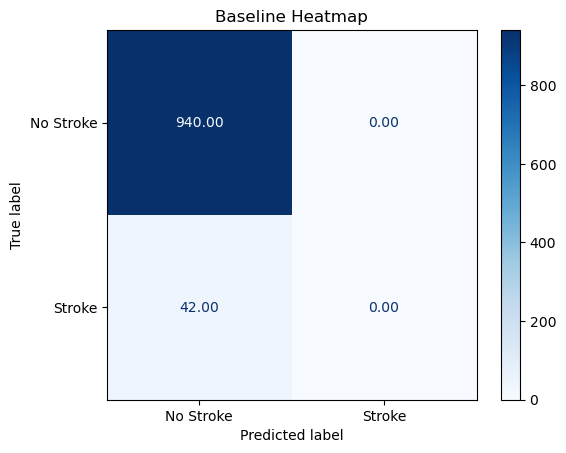

In [56]:
y_true = y_test_redefined
y_pred = [0] * len(y_true)
print(set(y_pred))
accuracy = accuracy_score(y_true, y_pred)

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)
    
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Stroke', 'Stroke'])
disp.plot(cmap='Blues', values_format=".2f")
plt.title("Baseline Heatmap")
plt.savefig('confusion_matrix_baseline.png')
plt.show()

{0, 1}
[[918  22]
 [ 36   6]]


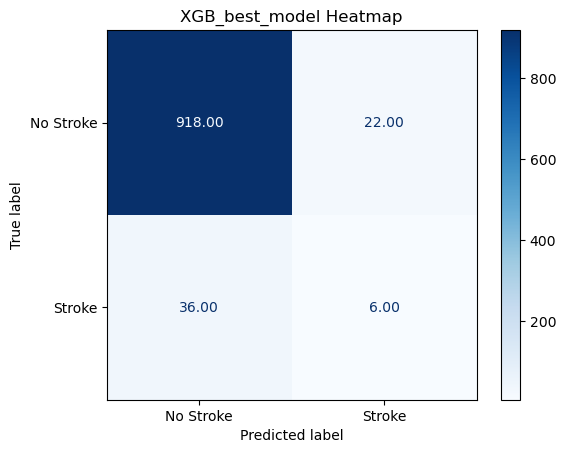

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_true = y_test_redefined
y_pred = XGB_best_models[4].predict(X_test_redefined)
print(set(y_pred))
accuracy = accuracy_score(y_true, y_pred)

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)
    
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Stroke', 'Stroke'])
disp.plot(cmap='Blues', values_format=".2f")
plt.title("XGB_best_model Heatmap")
plt.savefig('confusion_matrix_XGB_BestModel.png')
plt.show()

In [53]:
X_other_redefined, X_test_redefined, y_other_redefined, y_test_redefined = train_test_split(X, y, test_size=0.2, random_state=168, stratify=y)

In [80]:
y_test_redefined_pred = KNC_best_models[0].predict(X_test_redefined)

In [114]:
print(X.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')


## Importance

In [123]:
best_model = XGB_best_models[4]

# Split the data 
X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state=168, stratify=y)

ftr_names = X.columns
nr_runs = 10
scores = np.zeros([len(ftr_names),nr_runs])

test_score = best_model.score(X_test,y_test)
print('test score = ',test_score)
print('test baseline = ',np.sum(y_test == '0')/len(y_test))
# loop through the features
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        acc_scores.append(best_model.score(X_test_shuffled,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

test score =  0.9429735234215886
test baseline =  0.0
shuffling gender
   shuffled test score: 0.942 +/- 0.002
shuffling age
   shuffled test score: 0.934 +/- 0.005
shuffling hypertension
   shuffled test score: 0.939 +/- 0.002
shuffling heart_disease
   shuffled test score: 0.941 +/- 0.001
shuffling ever_married
   shuffled test score: 0.944 +/- 0.002
shuffling work_type
   shuffled test score: 0.934 +/- 0.004
shuffling Residence_type
   shuffled test score: 0.945 +/- 0.001
shuffling avg_glucose_level
   shuffled test score: 0.938 +/- 0.006
shuffling bmi
   shuffled test score: 0.944 +/- 0.004
shuffling smoking_status
   shuffled test score: 0.939 +/- 0.003


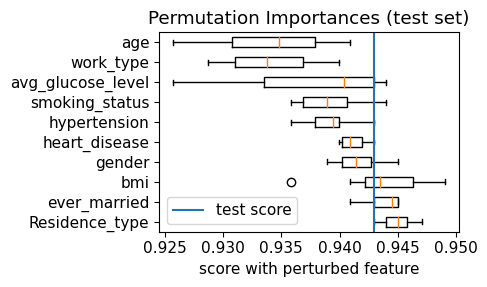

In [165]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 11})
plt.figure(figsize=(5,3))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.savefig('permutation feature importance.png')
plt.show()

In [131]:
X_train, X_CV, y_train, y_CV = train_test_split(X_other, y_other, test_size=0.25, random_state=42)
# fit_transform the training set
X_prep = preprocessor.fit_transform(X_train)
# little hacky, but collect feature names
feature_names = preprocessor.get_feature_names_out()

df_train = pd.DataFrame(data=X_prep,columns=feature_names)

df_CV = preprocessor.transform(X_CV)
df_CV = pd.DataFrame(data=df_CV,columns = feature_names)

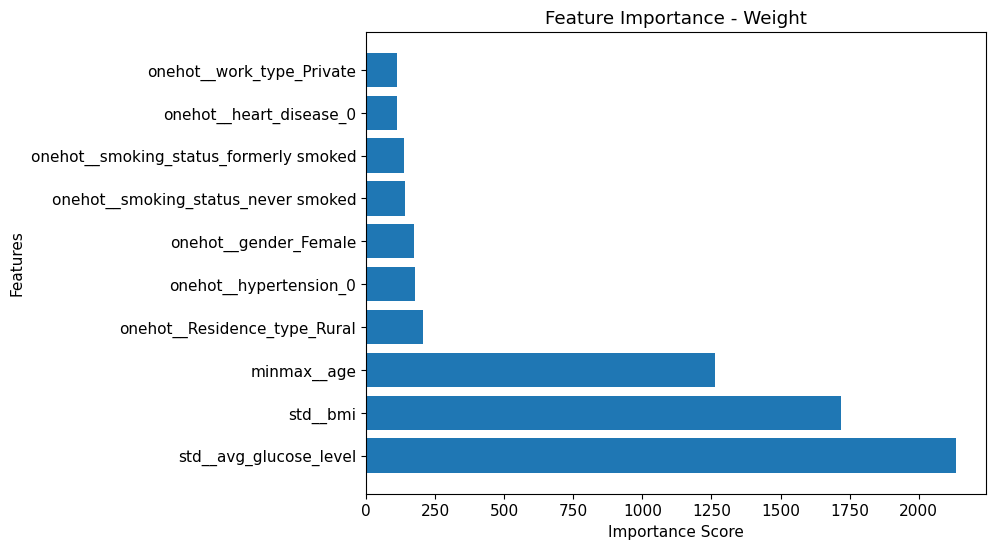

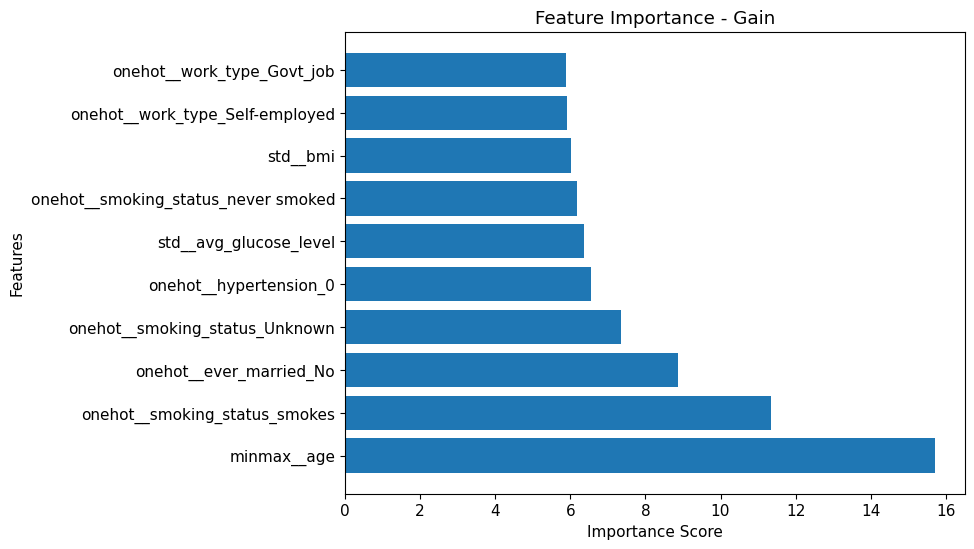

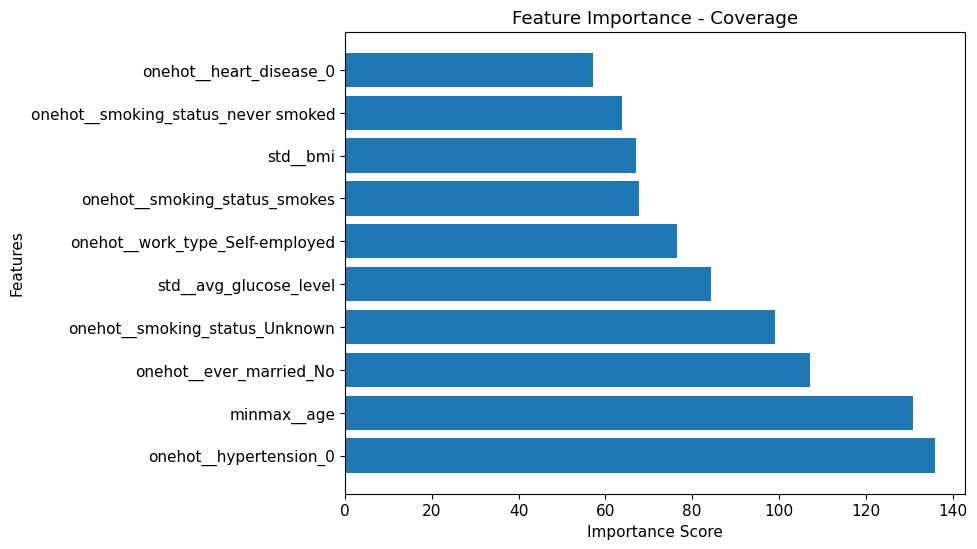

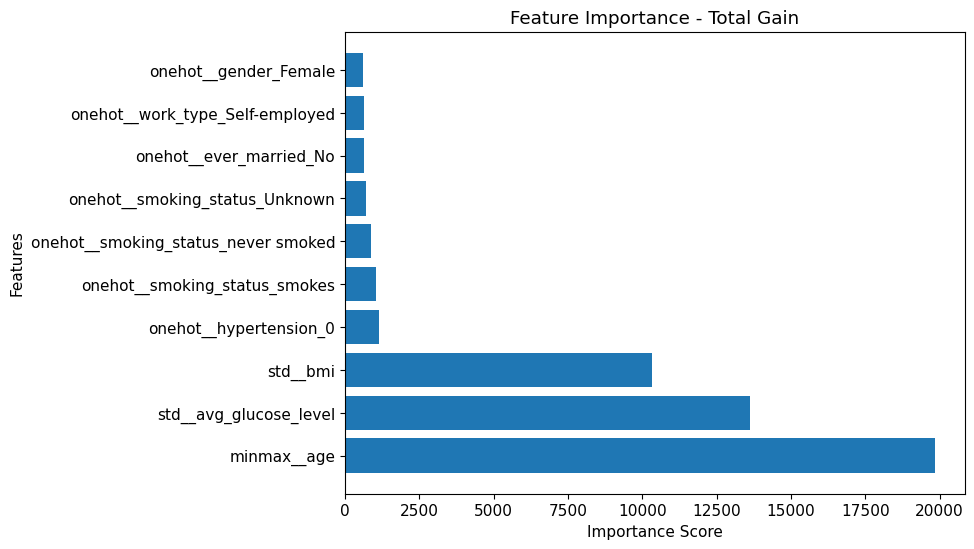

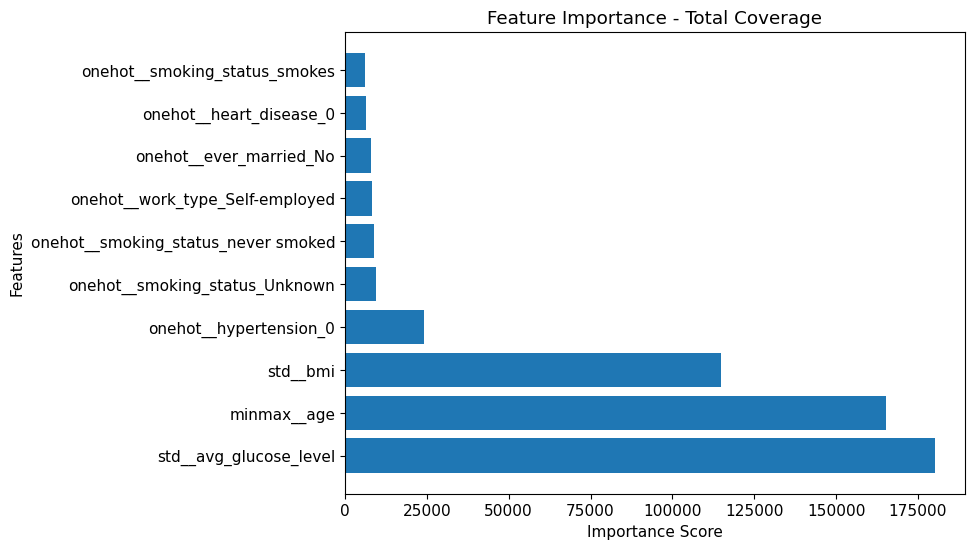

In [140]:
all_weights = {f'f{i}': 0 for i in range(len(feature_names))}
all_gains = all_weights.copy()
all_coverage = all_weights.copy()
all_total_gain = all_weights.copy()
all_total_coverage = all_weights.copy()

# Update the mapping 
all_weights.update(weights)
all_gains.update(gains)
all_coverage.update(coverage)
all_total_gain.update(total_gain)
all_total_coverage.update(total_coverage)

ordered_feature_names = [feature_names[int(f[1:])] for f in all_weights.keys()]

# Replace the generic 'f{i}' feature names with the actual feature names
def replace_feature_names(sorted_data, feature_names):
    return [(feature_names[int(feature[1:])], importance) for feature, importance in sorted_data]

# Sort the features by each metric and get the top 10 with actual names
sorted_weight_with_names = replace_feature_names(sorted(all_weights.items(), key=lambda x: x[1], reverse=True)[:10], ordered_feature_names)
sorted_gain_with_names = replace_feature_names(sorted(all_gains.items(), key=lambda x: x[1], reverse=True)[:10], ordered_feature_names)
sorted_coverage_with_names = replace_feature_names(sorted(all_coverage.items(), key=lambda x: x[1], reverse=True)[:10], ordered_feature_names)
sorted_total_gain_with_names = replace_feature_names(sorted(all_total_gain.items(), key=lambda x: x[1], reverse=True)[:10], ordered_feature_names)
sorted_total_coverage_with_names = replace_feature_names(sorted(all_total_coverage.items(), key=lambda x: x[1], reverse=True)[:10], ordered_feature_names)

# Plot feature importance for each metric using the actual feature names
plot_feature_importance(sorted_weight_with_names, 'Feature Importance - Weight')
plot_feature_importance(sorted_gain_with_names, 'Feature Importance - Gain')
plot_feature_importance(sorted_coverage_with_names, 'Feature Importance - Coverage')
plot_feature_importance(sorted_total_gain_with_names, 'Feature Importance - Total Gain')
plot_feature_importance(sorted_total_coverage_with_names, 'Feature Importance - Total Coverage')

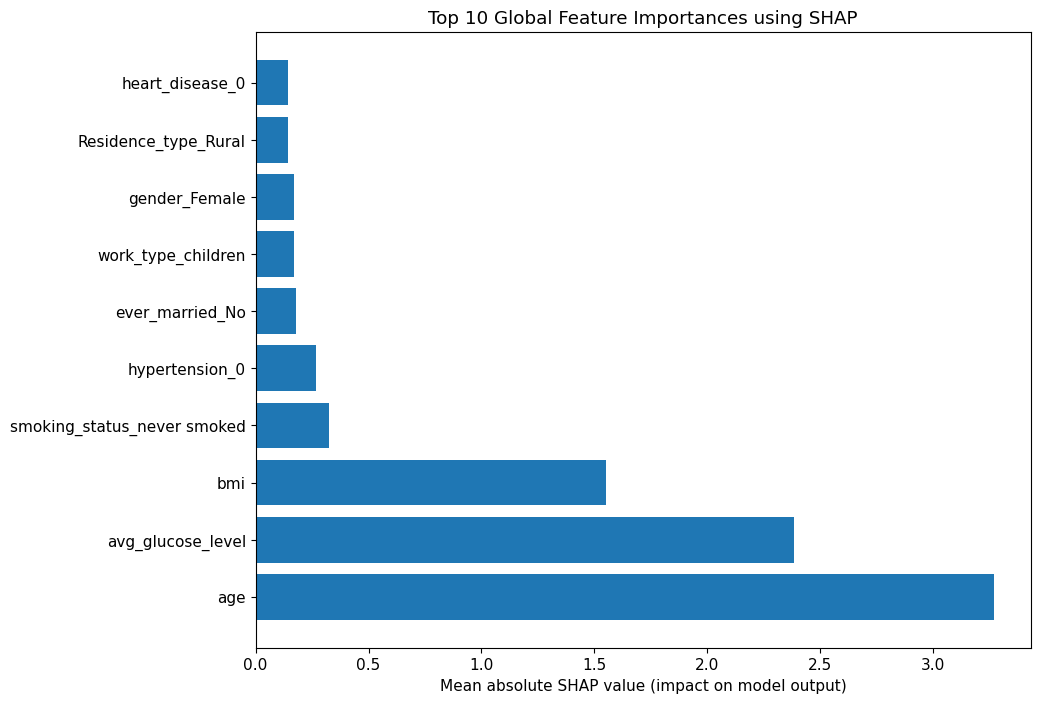

In [173]:
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier


best_model = XGB_best_models[0]

# Preprocess the data using the pipeline's transformer
X_processed = preprocessor.fit_transform(X)

# Create a SHAP explainer object with the model
explainer = shap.Explainer(best_model.named_steps['xgbclassifier'])

# Calculate SHAP values 
shap_values = explainer.shap_values(X_processed)

# Sum the absolute SHAP values to get a measure of global importance
shap_sum = np.abs(shap_values).mean(axis=0)

# Sort the features by importance
feature_order = np.argsort(shap_sum)[::-1]

# Get feature names
feature_names = get_feature_names(preprocessor)  # Function provided in a previous response

# Create the bar plot for the top N features
top_features = feature_order[:N]
plt.figure(figsize=(10, 8))
plt.barh(range(N), shap_sum[top_features][::-1], tick_label=np.array(feature_names)[top_features][::-1])
plt.xlabel('Mean absolute SHAP value (impact on model output)')
plt.title('Top 10 Global Feature Importances using SHAP')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

In [68]:
import shap
from IPython.display import display

best_model = XGB_best_models[4]

# Fit and transform the test data
preprocessor.fit(X_train)
X_test_transformed = preprocessor.transform(X_test)

explainer = shap.Explainer(best_model.named_steps['xgbclassifier'])

shap_values = explainer.shap_values(X_test_transformed)

shap.initjs()

feature_names_transformed = preprocessor.get_feature_names_out()

# Display force plot for the 0th data point
display(shap.force_plot(explainer.expected_value, shap_values[99,:], feature_names=feature_names_transformed))

# Display force plot for the 100th data point
display(shap.force_plot(explainer.expected_value, shap_values[226,:], feature_names=feature_names_transformed))

# Display force plot for the 200th data point
display(shap.force_plot(explainer.expected_value, shap_values[106,:], feature_names=feature_names_transformed))

In [32]:
per_0 = format(len(df[df['stroke']==0])/len(df),".0%")
per_1 = format(len(df[df['stroke']==1])/len(df),".0%")
distribution_df = pd.DataFrame({
    'Type': ['No Stroke', 'Stroke'],  # Assuming 0 is 'No Stroke' and 1 is 'Stroke'
    'Percentage': [per_0, per_1]
})

# Add column names
distribution_df.columns = ['Type Name', 'Percentage']
print(distribution_df)

   Type Name Percentage
0  No Stroke        95%
1     Stroke         5%


In [33]:
import pandas as pd

# Assuming distribution_df is your DataFrame
distribution_df = pd.DataFrame({
    'Type Name': ['No Stroke', 'Stroke'],
    'Percentage': ["95%", "5%"]
})

# Style the DataFrame to add a border
styled_df = distribution_df.style.set_table_styles(
    [{
        'selector': 'th',
        'props': [('border', '1px solid gray')]
    }, {
        'selector': 'td',
        'props': [('border', '1px solid gray')]
    }],
    overwrite=False
)

# Display the styled DataFrame
styled_df

,Type Name,Percentage
0,No Stroke,95%
1,Stroke,5%


In [46]:
import shap
from IPython.display import display


# Find the indices of instances in X_test where 'stroke' is 1
stroke_indices = y_test[y_test == 1].index

X_test_transformed = preprocessor.transform(X_test)

# Initialize SHAP explainer
explainer = shap.Explainer(best_model.named_steps['xgbclassifier'], X_test_transformed)

# Compute SHAP values 
shap_values = explainer.shap_values(X_test_transformed)

shap.initjs()

feature_names_transformed = preprocessor.get_feature_names_out()

for index in stroke_indices:
    transformed_index = list(X_test.index).index(index)
    display(shap.force_plot(explainer.expected_value, shap_values[transformed_index,:], feature_names=feature_names_transformed))